In [1]:
from PipelineTS.dataset import LoadWebSales

In [2]:
init_data = LoadWebSales()[['date', 'type_a']]

<Axes: >

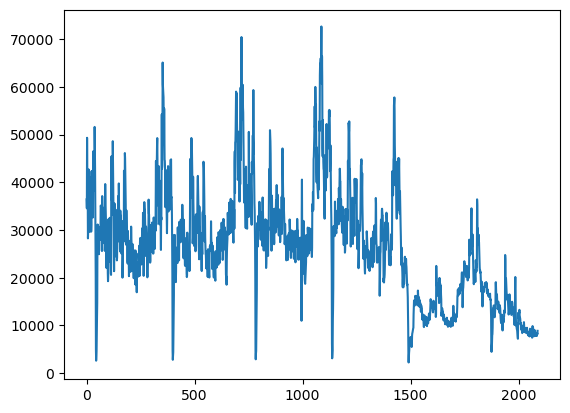

In [3]:
init_data.type_a.plot()

In [4]:
valid_data = init_data.iloc[-30:, :]
data = init_data.iloc[:-30, :]
data.tail(5)

,date,type_a
2054,2021-08-10,9261
2055,2021-08-11,8976
2056,2021-08-12,8850
2057,2021-08-13,8731
2058,2021-08-14,7862


# PipelineTS

In [5]:
from PipelineTS.pipeline import PipelineTS, PipelineConfigs

In [6]:
# list all models
PipelineTS.list_models()

['prophet',
 'auto_arima',
 'catboost',
 'lightgbm',
 'xgboost',
 'wide_gbrt',
 'd_linear',
 'n_linear',
 'n_beats',
 'n_hits',
 'tcn',
 'tft',
 'gau',
 'stacking_rnn',
 'time2vec',
 'multi_output_model',
 'multi_step_model']

In [7]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

pipeline_configs = PipelineConfigs([
    ('wide_gbrt', {'init_configs': {'quantile': None, 'linear_tree': True}}),
    ('multi_output_model', {'init_configs': {'quantile': None, 'linear_tree': True}}),
    ('multi_output_model', {'init_configs': {'quantile': None, 'estimator': XGBRegressor, 'random_state': 42}}),
    ('multi_output_model', {'init_configs': 
                            {'quantile': None, 'estimator': CatBoostRegressor, 'random_state': 42}
                           }),
])

,model_name,model_name_with_index,model_configs
0,multi_output_model,multi_output_model_1,"{'init_configs': {'quantile': None, 'linear_tree': True}, 'fit_configs': {}, 'predict_configs': {}}"
1,multi_output_model,multi_output_model_2,"{'init_configs': {'quantile': None, 'estimator': <class 'xgboost.sklearn.XGBRegressor'>, 'random_state': 42}, 'fit_configs': {}, 'predict_configs': {}}"
2,multi_output_model,multi_output_model_3,"{'init_configs': {'quantile': None, 'estimator': <class 'catboost.core.CatBoostRegressor'>, 'random_state': 42}, 'fit_configs': {}, 'predict_configs': {}}"
3,wide_gbrt,wide_gbrt_1,"{'init_configs': {'quantile': None, 'linear_tree': True}, 'fit_configs': {}, 'predict_configs': {}}"


In [8]:
from sklearn.metrics import mean_absolute_error
pipeline = PipelineTS(
    time_col='date', 
    target_col='type_a', 
    lags=30, 
    random_state=42, 
    metric=mean_absolute_error, 
    metric_less_is_better=True,
    configs=pipeline_configs,
    include_init_config_model=True,
    models=['wide_gbrt']
)

In [9]:
pipeline.fit(data, valid_df=valid_data)

23:49:14 2023-10-08 - PipelineTS - fitting and evaluating wide_gbrt...


ValueError: DataFrame.dtypes for data must be int, float or bool.
Did not expect the data types in the following fields: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118